<a href="https://colab.research.google.com/github/MansiSharma7552/ML-Uni/blob/main/Mobile_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold, cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report,ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC

import warnings
from colorama import Fore,  Back, Style

warnings.filterwarnings("ignore")


In [ ]:
# Reading Data
Data = pd.read_csv(r'C:\Users\Lakshita\OneDrive\Desktop\Mobile_dataset.csv')
df = pd.DataFrame(Data)
df

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0


In [ ]:
#Data Analysis
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [ ]:
df.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [ ]:
pip install -U ydata-profiling


Note: you may need to restart the kernel to use updated packages.


In [ ]:
pip install ydata-sdk

Note: you may need to restart the kernel to use updated packages.


In [ ]:
import os
os.environ['YDATA_LICENSE_KEY'] = '{913cceba-36f4-465b-b9b4-4fdd63db5e44}'


In [ ]:
from ydata_profiling import ProfileReport


In [ ]:
profile = ProfileReport(df, title="Profiling Report")

In [ ]:
# Data Overview
#from IPython.core.display import display,HTML
#display(HTML(ProfileReport(df).to_html()))

In [ ]:
# Data Preprocessing
pd.DataFrame(df.isnull().sum(), columns= ['Number of missing values'])

,Number of missing values
battery_power,0
blue,0
clock_speed,0
dual_sim,0
fc,0
four_g,0
int_memory,0
m_dep,0
mobile_wt,0
n_cores,0


In [ ]:
df.duplicated().sum()

0

In [ ]:
pd.DataFrame(df.nunique().sort_values(), columns= ['Number of unique values'])

,Number of unique values
blue,2
touch_screen,2
dual_sim,2
four_g,2
three_g,2
wifi,2
price_range,4
n_cores,8
m_dep,10
sc_h,15


In [ ]:
pip install PyQt5==5.15.10

Note: you may need to restart the kernel to use updated packages.


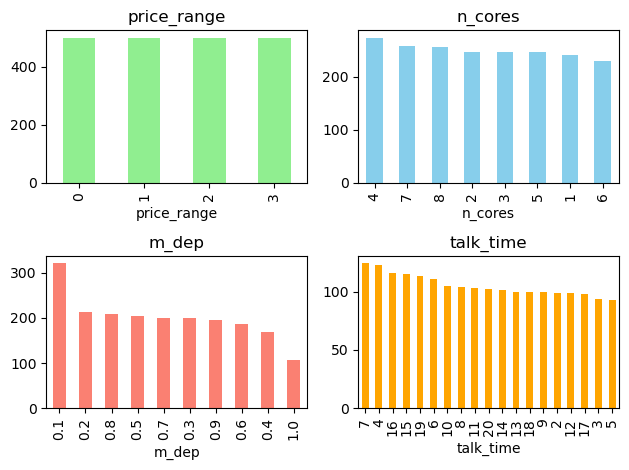

In [ ]:
fig, axs = plt.subplots(2, 2)

df['price_range'].sort_values().value_counts().plot(kind='bar', color=["lightgreen"], ax=axs[0, 0])
axs[0, 0].set_title('price_range', fontsize = 12)

df['n_cores'].value_counts().plot(kind='bar', color='skyblue', ax=axs[0, 1])
axs[0, 1].set_title('n_cores', fontsize = 12)

df['m_dep'].value_counts().plot(kind='bar', color='salmon', ax=axs[1, 0])
axs[1,0].set_title('m_dep', fontsize = 12)

df['talk_time'].value_counts().plot(kind='bar', color='orange', ax=axs[1, 1])
axs[1,1].set_title('talk_time', fontsize = 12)

plt.tight_layout()
plt.show()

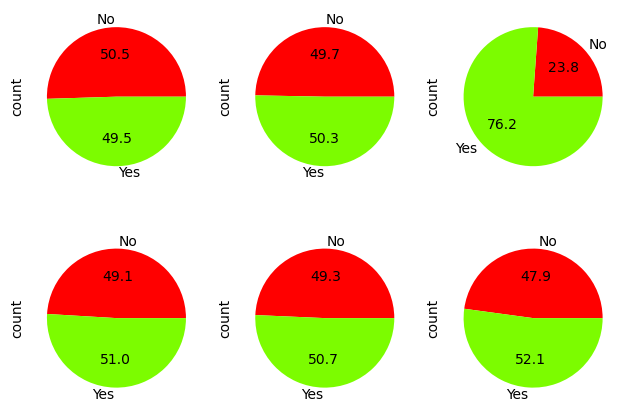

In [ ]:
fig, axs = plt.subplots(2, 3)
sns.set_palette(['red', 'lawngreen'])

df['blue'].value_counts().plot(kind='pie',labels = ['No', 'Yes'], autopct="%.1f", ax=axs[0, 0])

df['touch_screen'].value_counts().sort_values().plot(kind='pie',labels = ['No','Yes'], autopct="%.1f",ax=axs[0, 1])

df['dual_sim'].value_counts().sort_values().plot(kind='pie',labels = ['No','Yes'], autopct="%.1f" ,ax=axs[1,0])

df['wifi'].value_counts().sort_values().plot(kind='pie', labels = ['No','Yes'], autopct="%.1f", ax=axs[1,1])

df['three_g'].value_counts().sort_values().plot(kind='pie', labels = ['No', 'Yes'], autopct="%.1f", ax=axs[0,2])

df['four_g'].value_counts().sort_values().plot(kind='pie',  labels = ['No','Yes'], autopct="%.1f", ax=axs[1,2])


plt.tight_layout()
plt.show()


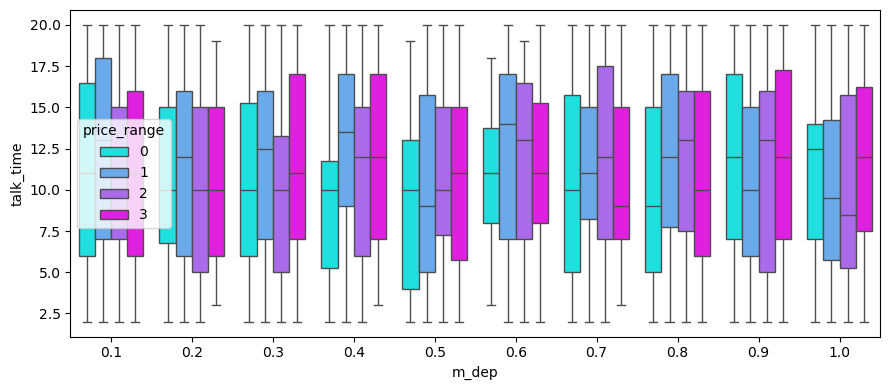

In [ ]:
plt.figure(figsize=(9,4))

sns.boxplot(data=df, x="m_dep", y="talk_time", hue="price_range" , palette= 'cool')
plt.tight_layout()
plt.show()


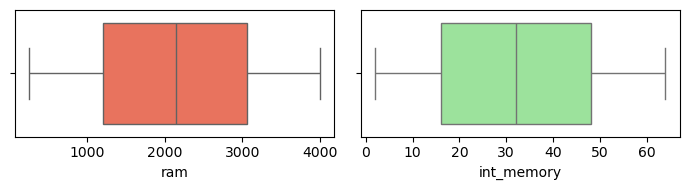

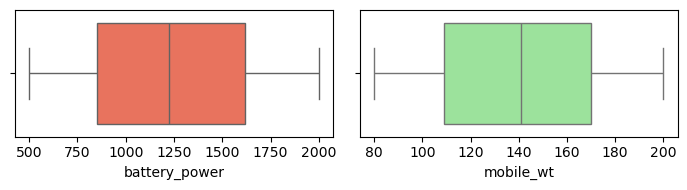

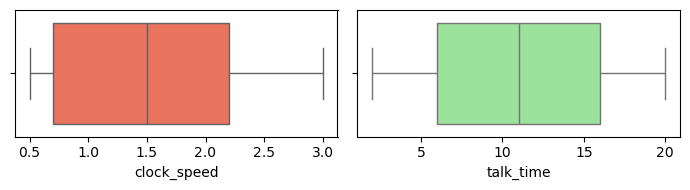

In [ ]:
Numerical = ['ram','int_memory','battery_power','mobile_wt','clock_speed','talk_time']
i=0
while i<6:
    fig = plt.figure(figsize=[7,2])
    plt.subplot(1,2,1)
    sns.boxplot(x=Numerical[i], data=df, color='tomato')
    i += 1
    plt.subplot(1,2,2)
    sns.boxplot(x=Numerical[i], data=df, color='lightgreen')
    i += 1

    plt.tight_layout()
    plt.show()

In [ ]:
pip install fmriprep-docker

Note: you may need to restart the kernel to use updated packages.


Text(0.5, 1.0, 'Number of Cores')

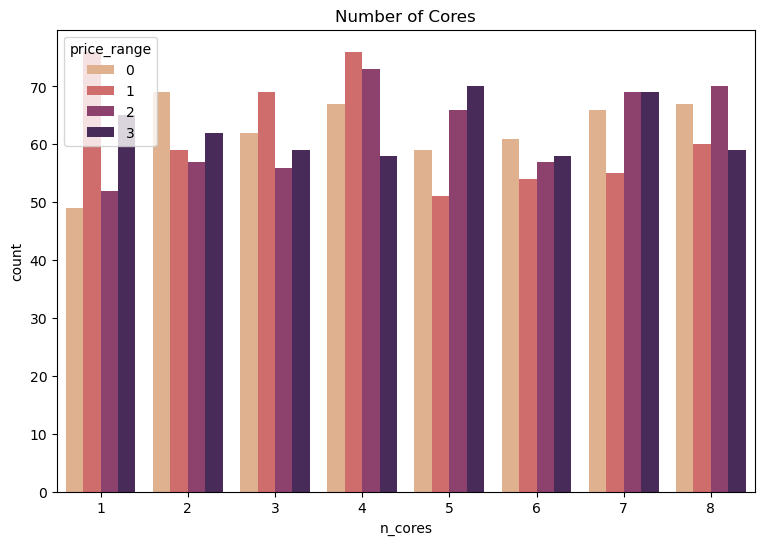

In [ ]:
plt.figure(figsize=(9,6))

sns.countplot(data=df, x='n_cores', hue='price_range' , palette= "flare")
plt.title('Number of Cores')

<Axes: xlabel='mobile_wt', ylabel='Count'>

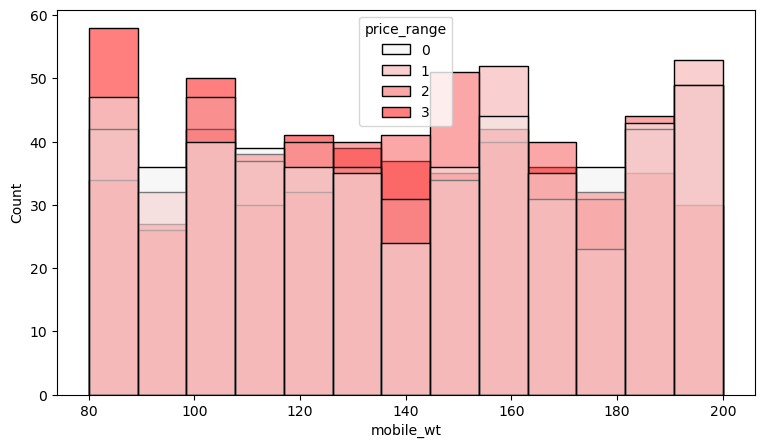

In [ ]:
plt.figure(figsize=(9,5))

sns.histplot(data=df, x='mobile_wt', palette='light:r', hue='price_range')

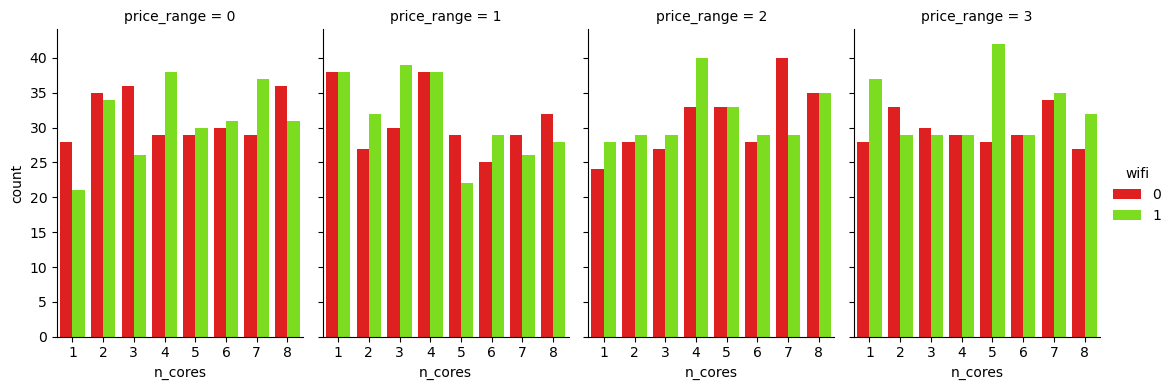

In [ ]:
sns.catplot(x="n_cores", hue="wifi", col="price_range",
                data=df, kind="count",
                height=4, aspect=.7 )

<Axes: xlabel='m_dep', ylabel='ram'>

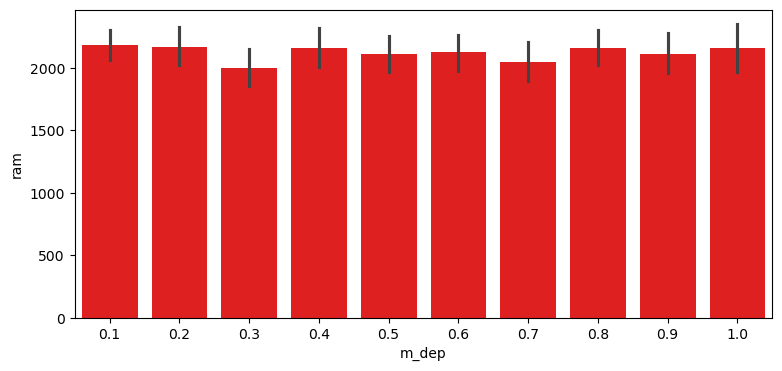

In [ ]:
plt.figure(figsize=(9,4))

sns.barplot(data=df, x='m_dep', y='ram')

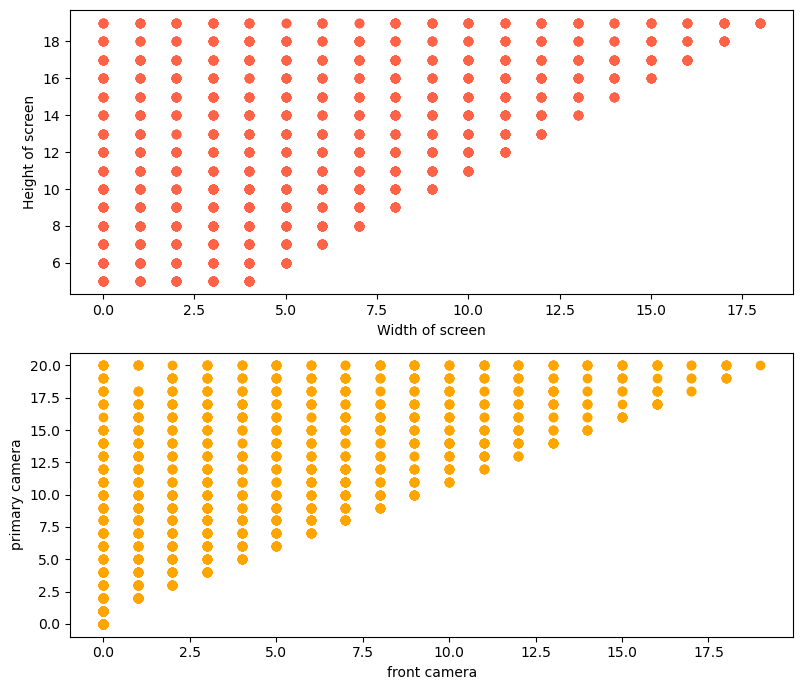

In [ ]:
fig, ax = plt.subplots(2, figsize=(8, 7), dpi = 100)

ax[0].scatter(x = df['sc_w'], y = df['sc_h'],color = 'tomato')
ax[0].set_xlabel("Width of screen")
ax[0].set_ylabel("Height of screen")

ax[1].scatter(x = df['fc'], y = df['pc'], color = 'orange')
ax[1].set_xlabel("front camera")
ax[1].set_ylabel("primary camera")

plt.tight_layout()
plt.show()


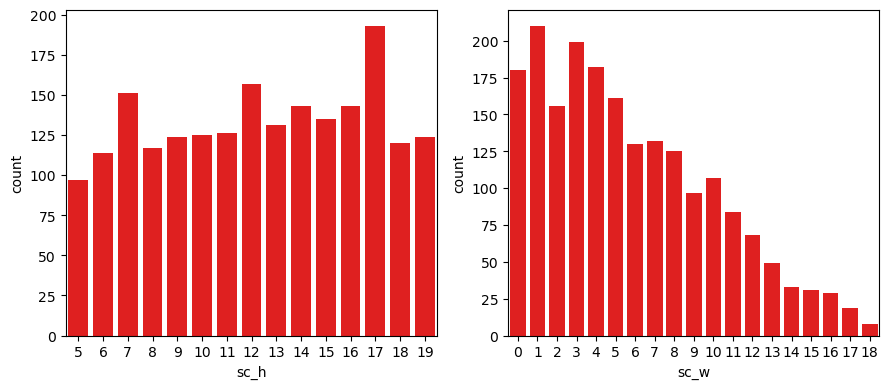

In [ ]:
plt.rcParams["figure.figsize"] = [9, 4]
plt.rcParams["figure.autolayout"] = True
f, axes = plt.subplots(1, 2)

sns.countplot(x = df['sc_h'],  data=df,ax=axes[0])
sns.countplot(x = df['sc_w'],  data=df,ax=axes[1])

plt.tight_layout()
plt.show()


In [ ]:
# Noise detection
df[(df["pc"] == 0) & (df['fc'] == 1)].index


Index([], dtype='int64')

In [ ]:
df[(df["three_g"] == 0) & (df['four_g'] == 1)].index

Index([], dtype='int64')

In [ ]:
# Distribution of neumerical features
Target = 'price_range'

Num_Features = ['battery_power', 'clock_speed', 'pc','fc','ram', 'px_width', 'px_height','talk_time',
               'sc_h', 'sc_w','int_memory','mobile_wt']

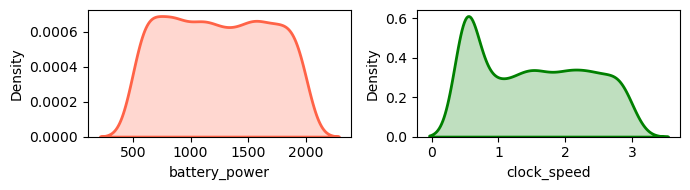

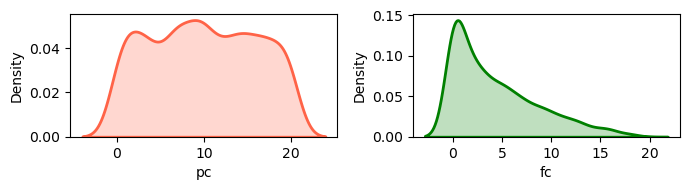

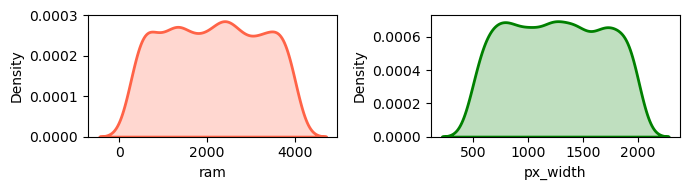

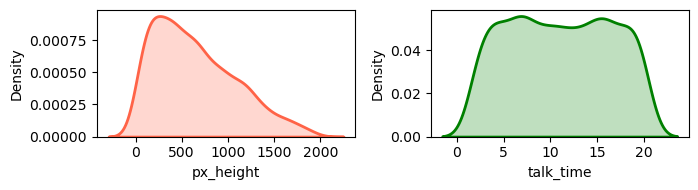

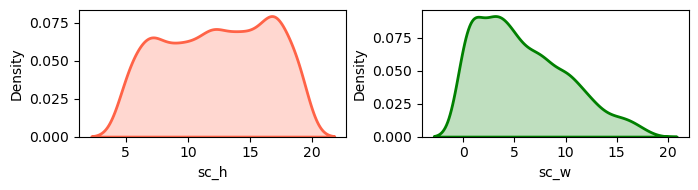

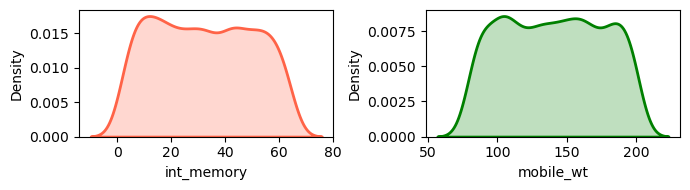

In [ ]:
i=0
while i<12:
    fig = plt.figure(figsize=[7,2])
    plt.subplot(1,2,1)
    sns.kdeplot(x=Num_Features[i], data=df,fill=True, linewidth=2, color='tomato')
    i += 1
    plt.subplot(1,2,2)
    sns.kdeplot(x=Num_Features[i], data=df,fill=True, linewidth=2, color='green')
    i += 1


    plt.tight_layout()
    plt.show()


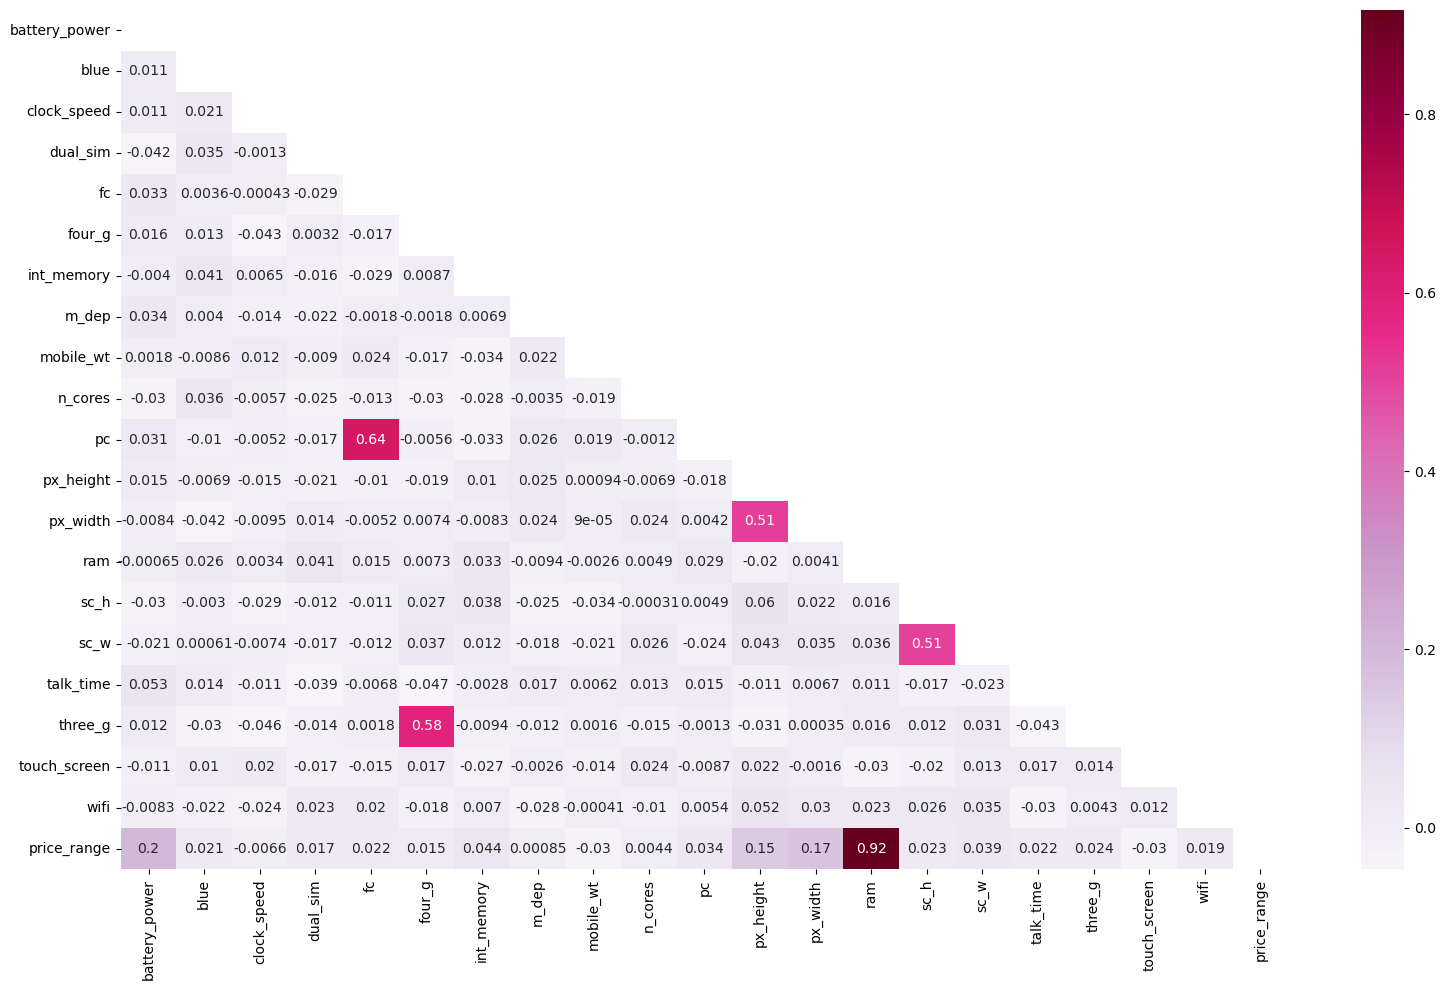

In [ ]:
# Checking the correlation of features
df_corr = df.corr()
plt.figure(figsize = (16, 10))

mask = np.triu(np.ones_like(df_corr))
sns.heatmap(df_corr,annot = True, cmap = plt.cm.PuRd , mask=mask)
plt.show()


In [ ]:
# Outliers prediction
df2 = df.copy()

In [ ]:
sc_w_Noise = df2[df2['sc_w'] < 2].index

px_height_Noise = df2[df2['px_height'] < 5].index

In [ ]:
print('noise values for sc_w: ', len(sc_w_Noise))
print('noise values for px_height: ', len(px_height_Noise))

noise values for sc_w:  390
noise values for px_height:  9


In [ ]:
# Model Building
X = df2.drop('price_range', axis=1)
y = df2['price_range']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)

In [ ]:
# Standard scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test = pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [ ]:
# Model SVM
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)

svm = SVC(probability=True, random_state=0)

param_grid = {'kernel': ['linear'],
               'C': [ 0.1, 1, 10, 50, 100]
             }

clf = GridSearchCV(svm, param_grid, cv=cv, scoring='accuracy', n_jobs=-1)
best_clf = clf.fit(X_train,y_train.ravel())


In [ ]:
best_clf.best_estimator_

SVC(C=50, kernel='linear', probability=True, random_state=0)

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       100
           1       0.99      0.97      0.98       100
           2       0.97      0.98      0.98       100
           3       0.99      0.98      0.98       100

    accuracy                           0.98       400
   macro avg       0.98      0.98      0.98       400
weighted avg       0.98      0.98      0.98       400




  					Model accuracy: 0.9825





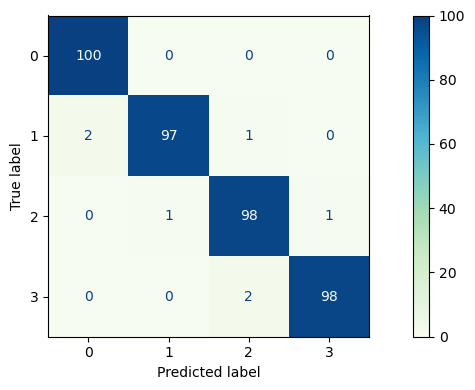

In [ ]:
y_pred = best_clf.predict(X_test)
print(classification_report(y_test , y_pred))
print('\n\n')
print(Style.BRIGHT,Fore.RED,"\t\t\t\t\tModel accuracy:", metrics.accuracy_score(y_test,y_pred))
print('\n\n')

ConfusionMatrixDisplay.from_estimator(clf, X_test, y_test, cmap = plt.cm.GnBu)

In [ ]:
# Model (Decision Tree)
df3 = df.copy()

In [ ]:
df3.loc[df3['sc_w'] < 2,'sc_w'] = 2

In [ ]:
df3['sc_w'].min()

2

In [ ]:
df3.loc[df3['px_height'] < 5,'px_height'] = 5

In [ ]:
df3['px_height'].min()

5

In [ ]:
df3

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,2,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0


In [ ]:
X = df3.drop('price_range', axis=1)
y = df3['price_range']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test = pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [ ]:
import warnings
warnings.filterwarnings('error', category=DeprecationWarning)

In [ ]:
# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

In [ ]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)

DTs = DecisionTreeClassifier(random_state=0)

param_grid = {'criterion' :['gini', 'entropy'],
              'max_features': ['auto', 'sqrt', 'log2'],
              'max_depth': np.arange(1, 15),
              'min_samples_split': np.arange(2, 15),
              'min_samples_leaf': np.arange(1, 15),
             }

clf2 = GridSearchCV(estimator=DTs, param_grid=param_grid, cv=cv, verbose=True)
best_clf2 = clf2.fit(X_train, y_train)

Fitting 5 folds for each of 15288 candidates, totalling 76440 fits


In [ ]:
best_clf2.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=10, max_features='sqrt',
                       min_samples_leaf=3, min_samples_split=10,
                       random_state=0)

              precision    recall  f1-score   support

           0       0.77      0.86      0.82       100
           1       0.63      0.64      0.64       100
           2       0.58      0.54      0.56       100
           3       0.75      0.71      0.73       100

    accuracy                           0.69       400
   macro avg       0.68      0.69      0.68       400
weighted avg       0.68      0.69      0.68       400




  					Model accuracy: 0.6875





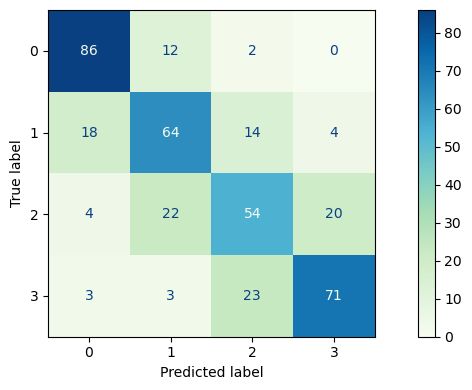

In [ ]:
y_pred = best_clf2.predict(X_test)
print(classification_report(y_test , y_pred))
print('\n\n')
print(Style.BRIGHT,Fore.RED,"\t\t\t\t\tModel accuracy:", metrics.accuracy_score(y_test,y_pred))
print('\n\n')

ConfusionMatrixDisplay.from_estimator(clf2, X_test, y_test, cmap = plt.cm.GnBu)

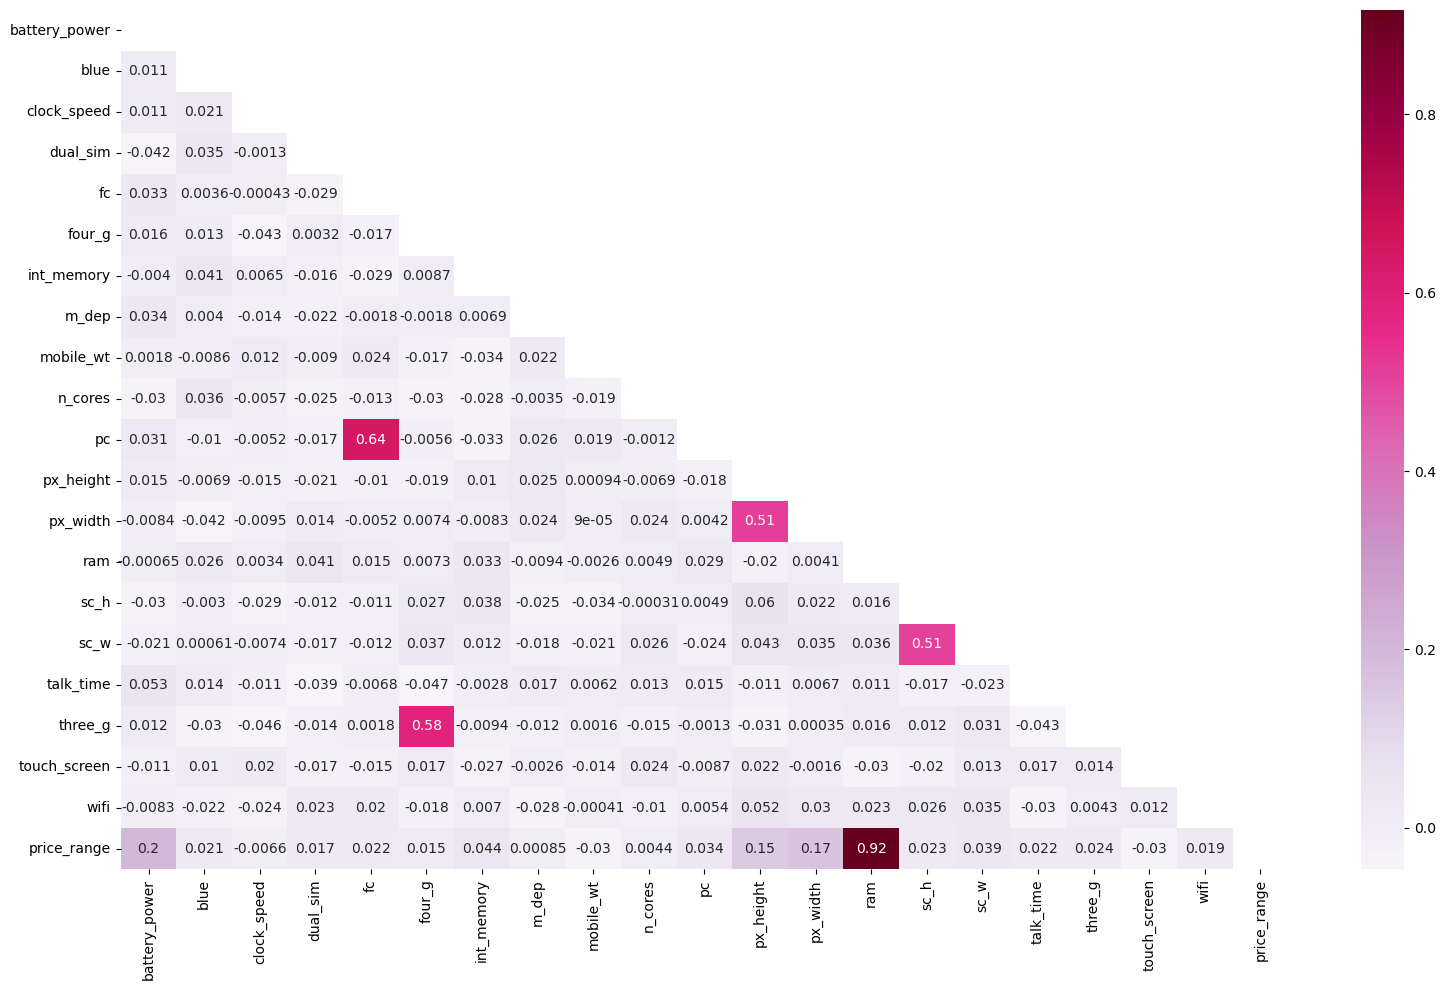

In [ ]:
df_corr = df.corr()
plt.figure(figsize = (16, 10))

mask = np.triu(np.ones_like(df_corr))
sns.heatmap(df_corr,annot = True, cmap = plt.cm.PuRd , mask=mask)
plt.show()


In [ ]:
df3.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [ ]:
X = pd.DataFrame(df3 , columns= ['battery_power', 'blue', 'dual_sim',
       'int_memory', 'mobile_wt', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi'])

y = df3['price_range']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test = pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [ ]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)

DTs = DecisionTreeClassifier(random_state=0)

param_grid = {'criterion' :['gini', 'entropy'],
              'max_features': ['auto', 'sqrt', 'log2'],
              'max_depth': np.arange(1, 15),
              'min_samples_split': np.arange(2, 15),
              'min_samples_leaf': np.arange(1, 15),
             }

clf2 = GridSearchCV(estimator=DTs, param_grid=param_grid, cv=cv, verbose=True)
best_clf2 = clf2.fit(X_train, y_train)

Fitting 5 folds for each of 15288 candidates, totalling 76440 fits


In [ ]:
best_clf2.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=12, max_features='sqrt',
                       min_samples_leaf=2, min_samples_split=6, random_state=0)

              precision    recall  f1-score   support

           0       0.72      0.89      0.80       100
           1       0.68      0.61      0.64       100
           2       0.78      0.73      0.75       100
           3       0.91      0.85      0.88       100

    accuracy                           0.77       400
   macro avg       0.77      0.77      0.77       400
weighted avg       0.77      0.77      0.77       400




  					Model accuracy: 0.77





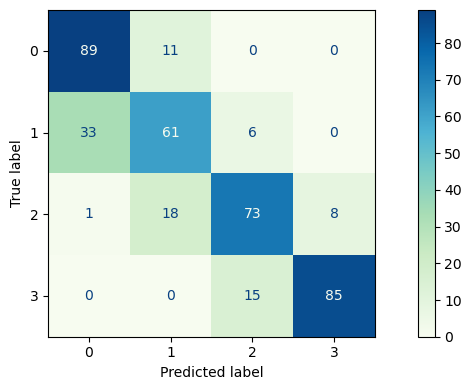

In [ ]:
y_pred = best_clf2.predict(X_test)
print(classification_report(y_test , y_pred))
print('\n\n')
print(Style.BRIGHT,Fore.RED,"\t\t\t\t\tModel accuracy:", metrics.accuracy_score(y_test,y_pred))
print('\n\n')
## confusion matrix

ConfusionMatrixDisplay.from_estimator(clf2, X_test, y_test, cmap = plt.cm.GnBu)

In [ ]:
#Random Forest(Model 3)
X = df3.drop('price_range', axis=1)
y = df3['price_range']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)

In [ ]:
 cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)

rf = RandomForestClassifier(max_features=None, bootstrap=True, random_state=0)

param_grid = {
    'n_estimators': [80, 100, 120, 140],
    'max_depth': np.arange(10, 15),
    'min_samples_split': [2, 3, 4],
    'min_samples_leaf': [1, 2, 3]
}


clf3 = GridSearchCV(estimator=rf, param_grid=param_grid, cv=cv, verbose=True)
best_clf3 = clf3.fit(X_train, y_train)

Fitting 5 folds for each of 180 candidates, totalling 900 fits


In [ ]:
best_clf3.best_estimator_

RandomForestClassifier(max_depth=12, max_features=None, min_samples_split=3,
                       random_state=0)

              precision    recall  f1-score   support

           0       0.96      0.95      0.95       100
           1       0.89      0.92      0.91       100
           2       0.84      0.82      0.83       100
           3       0.88      0.88      0.88       100

    accuracy                           0.89       400
   macro avg       0.89      0.89      0.89       400
weighted avg       0.89      0.89      0.89       400




  					Model accuracy: 0.8925





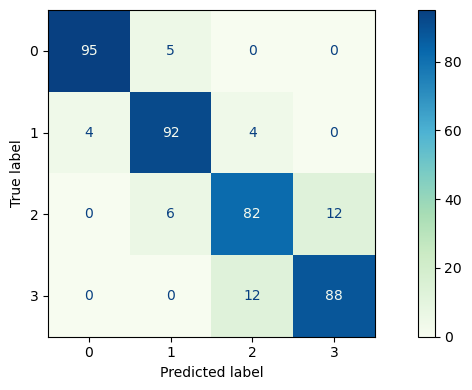

In [ ]:
y_pred = best_clf3.predict(X_test)
print(classification_report(y_test , y_pred))
print('\n\n')
print(Style.BRIGHT,Fore.RED,"\t\t\t\t\tModel accuracy:", metrics.accuracy_score(y_test,y_pred))
print('\n\n')

ConfusionMatrixDisplay.from_estimator(clf3, X_test, y_test, cmap = plt.cm.GnBu)

In [ ]:
rfclf = RandomForestClassifier(max_depth=12,n_estimators=130)
rfclf = rfclf.fit(X_train,y_train.ravel())
y_pred = rfclf.predict(X_test)

              precision    recall  f1-score   support

           0       0.94      0.93      0.93       100
           1       0.86      0.90      0.88       100
           2       0.85      0.88      0.87       100
           3       0.96      0.89      0.92       100

    accuracy                           0.90       400
   macro avg       0.90      0.90      0.90       400
weighted avg       0.90      0.90      0.90       400




  					Model accuracy: 0.9





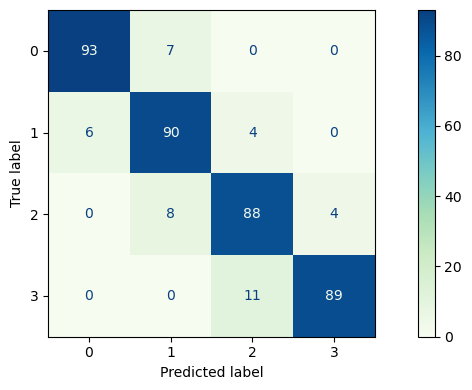

In [ ]:
print(classification_report(y_test , y_pred))
print('\n\n')
print(Style.BRIGHT,Fore.RED,"\t\t\t\t\tModel accuracy:", metrics.accuracy_score(y_test,y_pred))
print('\n\n')

ConfusionMatrixDisplay.from_estimator(rfclf, X_test, y_test, cmap = plt.cm.GnBu)